In [55]:
# 引入必要的包
import csv
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split

%matplotlib notebook

In [56]:
# 解决matplotlib显示中文问题
# 仅适用于Windows
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# MacOS请参考 http://wenda.chinahadoop.cn/question/5304 修改字体配置

In [57]:
#处理训练集，测试集
train_data1 = pd.read_excel('train_new.xlsx')
test_data1 = pd.read_excel('test_new.xlsx')
train_data1.fillna(0,inplace = True)
test_data1.fillna(0,inplace = True)

train_data1_1 = train_data1['参考信号接收功率采样点点数'] != 0
new_train_data1 = train_data1[train_data1_1]

test_data1_1 = test_data1['参考信号接收功率采样点点数'] != 0
new_test_data1 = test_data1[test_data1_1]

for i in new_train_data1.columns[4:52]:
    new_train_data1[i]/= new_train_data1['参考信号接收功率采样点点数']
for i in new_test_data1.columns[4:52]:
    new_test_data1[i]/= new_test_data1['参考信号接收功率采样点点数']

new_test_data1.to_excel('test1.xlsx')
new_train_data1.to_excel('train1.xlsx')

c:\users\lenovo\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [58]:
train_data = pd.read_excel('train1.xlsx')
test_data = pd.read_excel('test1.xlsx')

In [59]:
print('训练集有{}条记录。'.format(len(train_data)))
print('测试集有{}条记录。'.format(len(test_data)))

训练集有1194条记录。
测试集有294条记录。


In [60]:


# 构建训练测试数据
# 特征处理
feat_names = train_data.columns[4:52].tolist()
X_train = train_data[feat_names].values
print('共有{}维特征。'.format(X_train.shape[1]))
X_test = test_data[feat_names].values


# 标签处理
train_labels = train_data['网元中文名'].values
test_labels = test_data['网元中文名'].values

# 使用sklearn.preprocessing.LabelEncoder进行类别标签处理
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
y_train = label_enc.fit_transform(train_labels)
y_test = label_enc.transform(test_labels)

print('类别标签：', label_enc.classes_)
for i in range(len(label_enc.classes_)):
    print('编码 {} 对应标签 {}。'.format(i, label_enc.inverse_transform(i)))

共有48维特征。
类别标签： [0 1]
编码 0 对应标签 0。
编码 1 对应标签 1。


c:\users\lenovo\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\lenovo\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [62]:

k_range = [5, 10, 15]
knn_models = []
knn_scores = []
knn_durations = []

for k in k_range:
    print('训练kNN（k={}）...'.format(k), end='')
    knn = KNeighborsClassifier(n_neighbors=k)
    # 训练模型
    start = time.time()
    knn.fit(X_train, y_train)
    
    # 计时
    end = time.time()
    duration = end - start
    print('耗时{:.4f}s'.format(duration), end=', ')
    
    # 验证模型
    
    score = knn.score(X_test, y_test)
    print('准确率：{:.3f}'.format(score))
    print(knn.predict(X_test))
    
    knn_models.append(knn)
    knn_durations.append(duration)
    knn_scores.append(score)

print()
knn_mean_duration = np.mean(knn_durations)
print('训练kNN平均耗时{:.4f}s'.format(knn_mean_duration))

# 记录最优模型knn_models
best_idx = np.argmax(knn_scores)
best_knn_acc = knn_scores[best_idx]
print('最优的kNN模型，k={}，准确率：{:.3f}'.format(knn_models[best_idx].get_params()['n_neighbors'], 
                                        best_knn_acc))








训练kNN（k=5）...耗时0.0110s, 准确率：0.990
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
训练kNN（k=10）...耗时0.0080s, 准确率：0.990
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [63]:
c_range = [0.01, 1, 100]

lr_models = []
lr_scores = []
lr_durations = []

for c in c_range:
    print('训练Logistic Regression（C={}）...'.format(c), end='')
    lr_model = LogisticRegression(C=c)
    # 训练模型
    start = time.time()
    lr_model.fit(X_train, y_train)
    
    # 计时
    end = time.time()
    duration = end - start
    print('耗时{:.4f}s'.format(duration), end=', ')
    
    # 验证模型
    score = lr_model.score(X_test, y_test)
    print('准确率：{:.3f}'.format(score))
    
    lr_models.append(lr_model)
    lr_durations.append(duration)
    lr_scores.append(score)

print()
lr_mean_duration = np.mean(lr_durations)
print('训练Logistic Regression平均耗时{:.4f}s'.format(lr_mean_duration))

# 记录最优模型
best_idx = np.argmax(lr_scores)
best_lr_acc = lr_scores[best_idx]
print('最优的Logistic Regression模型，C={}，准确率：{:.3f}'.format(lr_models[best_idx].get_params()['C'], 
                                        best_lr_acc))

训练Logistic Regression（C=0.01）...耗时0.0430s, 准确率：0.493
训练Logistic Regression（C=1）...耗时0.0860s, 准确率：0.925
训练Logistic Regression（C=100）...耗时0.0390s, 准确率：0.772

训练Logistic Regression平均耗时0.0560s
最优的Logistic Regression模型，C=1，准确率：0.925


In [64]:
c_range = [100, 1000, 10000]

svm_models = []
svm_scores = []
svm_durations = []

for c in c_range:
    print('训练SVM（C={}）...'.format(c), end='')
    svm_model = SVC(C=c)
    # 训练模型
    start = time.time()
    svm_model.fit(X_train, y_train)
    
    # 计时
    end = time.time()
    duration = end - start
    print('耗时{:.4f}s'.format(duration), end=', ')
    
    # 验证模型
    score = svm_model.score(X_test, y_test)
    print('准确率：{:.3f}'.format(score))
    
    svm_models.append(svm_model)
    svm_durations.append(duration)
    svm_scores.append(score)

print()
svm_mean_duration = np.mean(svm_durations)
print('训练SVM平均耗时{:.4f}s'.format(svm_mean_duration))

# 记录最优模型
best_idx = np.argmax(svm_scores)
best_svm_acc = svm_scores[best_idx]
print('最优的SVM模型，C={}，准确率：{:.3f}'.format(svm_models[best_idx].get_params()['C'], 
                                        best_svm_acc))

训练SVM（C=100）...耗时0.1560s, 准确率：0.779
训练SVM（C=1000）...耗时0.0950s, 准确率：0.776
训练SVM（C=10000）...耗时0.0890s, 准确率：0.776

训练SVM平均耗时0.1133s
最优的SVM模型，C=100，准确率：0.779


In [65]:
depth_range = [50, 100, 150]

tree_models = []
tree_scores = []
tree_durations = []

for depth in depth_range:
    print('训练决策树（max_depth={}）...'.format(depth), end='')
    tree_model = DecisionTreeClassifier(max_depth=depth)
    # 训练模型
    start = time.time()
    tree_model.fit(X_train, y_train)
    
    # 计时
    end = time.time()
    duration = end - start
    print('耗时{:.4f}s'.format(duration), end=', ')
    
    # 验证模型
    score = tree_model.score(X_test, y_test)
    print('准确率：{:.3f}'.format(score))
    
    tree_models.append(tree_model)
    tree_durations.append(duration)
    tree_scores.append(score)

print()
tree_mean_duration = np.mean(tree_durations)
print('训练决策树平均耗时{:.4f}s'.format(tree_mean_duration))

# 记录最优模型
best_idx = np.argmax(tree_scores)
best_tree_acc = tree_scores[best_idx]
print('最优的决策树模型，max_depth={}，准确率：{:.3f}'.format(tree_models[best_idx].get_params()['max_depth'], 
                                        best_tree_acc))

训练决策树（max_depth=50）...耗时0.0810s, 准确率：0.946
训练决策树（max_depth=100）...耗时0.0660s, 准确率：0.946
训练决策树（max_depth=150）...耗时0.0520s, 准确率：0.942

训练决策树平均耗时0.0663s
最优的决策树模型，max_depth=50，准确率：0.946


In [66]:
rf_range = [100, 150 , 200]

rf_models = []
rf_scores = []
rf_durations = []

for rf in rf_range:
    print('训练随机森林（n_estimators={}）...'.format(rf), end='')
    rf_model = RandomForestClassifier(n_estimators=rf)
    # 训练模型
    start = time.time()
    rf_model.fit(X_train, y_train)
    
    # 计时
    end = time.time()
    duration = end - start
    print('耗时{:.4f}s'.format(duration), end=', ')
    
    # 验证模型
    score = rf_model.score(X_test, y_test)
    print('准确率：{:.3f}'.format(score))
    
    rf_models.append(rf_model)
    rf_durations.append(duration)
    rf_scores.append(score)

print()
rf_mean_duration = np.mean(rf_durations)
print('训练决策树平均耗时{:.4f}s'.format(rf_mean_duration))

# 记录最优模型
best_idx = np.argmax(rf_scores)
best_rf_acc = rf_scores[best_idx]
print('最优的决策树模型，n_estimators={}，准确率：{:.3f}'.format(rf_models[best_idx].get_params()['n_estimators'], 
                                        best_rf_acc))

训练随机森林（n_estimators=100）...耗时1.1471s, 准确率：0.946
训练随机森林（n_estimators=150）...耗时2.1981s, 准确率：0.793
训练随机森林（n_estimators=200）...耗时2.4801s, 准确率：0.803

训练决策树平均耗时1.9418s
最优的决策树模型，n_estimators=100，准确率：0.946


In [67]:

results_df = pd.DataFrame(columns=['Accuracy (%)', 'Time (s)'], index=['kNN', 'LR', 'SVM', 'DT','RF'])
results_df['Accuracy (%)'] = [best_knn_acc * 100, best_lr_acc * 100, best_svm_acc * 100, best_tree_acc * 100,best_rf_acc * 100]
results_df['Time (s)'] = [knn_mean_duration, lr_mean_duration, svm_mean_duration, tree_mean_duration, rf_mean_duration]



<IPython.core.display.Javascript object>


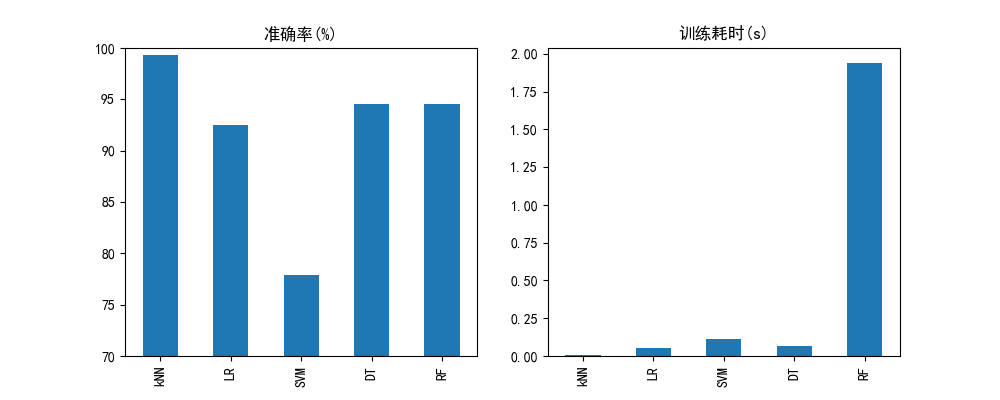

In [68]:
plt.figure(figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
results_df.plot(y=['Accuracy (%)'], kind='bar', ylim=[70, 100], ax=ax1, title='准确率(%)', legend=False)

ax2 = plt.subplot(1, 2, 2)
results_df.plot(y=['Time (s)'], kind='bar', ax=ax2, title='训练耗时(s)', legend=False)

In [69]:
# 保存结果
results_df.to_csv('./pred_results1.csv')

In [70]:
# 保存最优模型
import pickle

best_idx = np.argmax(knn_scores)
best_model = knn_models[best_idx]

saved_model_path = './predictor1.pkl'
with open(saved_model_path, 'wb') as f:
    pickle.dump(best_model, f)
